<a href="https://colab.research.google.com/github/kc11234/Datasets/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# prompt: /content/greenfuture_ideas_dataset (1).csv

import pandas as pd

df = pd.read_csv('/content/greenfuture_ideas_dataset (1).csv')

In [6]:
import sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('ideas', conn, index=False)

3000

In [7]:
pd.read_sql('SELECT * FROM ideas LIMIT 5', conn)

,Employee ID,Office Location,Department,Idea Submission Date,Idea Title,Idea Category,Number of Votes,Collaboration Status,Approval Status,Implementation Status,Security Concern Flag
0,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
1,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No
2,fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes
3,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
4,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No


In [8]:
conn.execute("INSERT INTO ideas (`Employee ID`, `Office Location`, `Department`, `Idea Title`) VALUES ('3001', 'London', 'Tech', 'Solar Panels Initiative')")

In [9]:
conn.execute("UPDATE ideas SET `Office Location` = 'Berlin' WHERE `Employee ID` = '3001'")

In [10]:
conn.execute("DELETE FROM ideas WHERE `Employee ID` = '3001'")

In [11]:
# Average votes by office location
pd.read_sql('SELECT `Office Location`, AVG(`Number of Votes`) as avg_votes FROM ideas GROUP BY `Office Location`', conn)

# Count of ideas by approval status
pd.read_sql('SELECT `Approval Status`, COUNT(*) as total FROM ideas GROUP BY `Approval Status`', conn)

,Approval Status,total
0,Approved,1037
1,Pending,970
2,Rejected,993


In [12]:
# activate R magic
%load_ext rpy2.ipython

In [13]:
get_ipython().system('apt-get update')
get_ipython().system('apt-get install -y r-base-core r-essentials')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,258 kB]
Fetched 3,515 kB in 2s (1,459 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy I

**Reasoning**:
Install the required R packages DBI and RSQLite using the R command.



In [14]:
get_ipython().run_cell_magic('R', '', 'install.packages(c("DBI", "RSQLite"), repos="http://cran.us.r-project.org", dependencies=TRUE)')

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/DBI_1.2.3.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/RSQLite_2.3.11.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpxzBLLt/downloaded_packages’


In [15]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [16]:
%R library(DBI)
%R library(RSQLite)
%R con <- dbConnect(RSQLite::SQLite(), ":memory:")

<rpy2.robjects.methods.RS4 object at 0x7fd951e30410> [25]
R classes: ('SQLiteConnection',)

In [22]:
%R library(DBI)
%R library(RSQLite)
%R library(methods) # Required for setAs
%R library(utils) # Required for methods
%R library(grDevices) # Required for methods
%R library(graphics) # Required for methods
%R library(stats) # Required for methods
%R library(base) # Required for methods

%R conn <- dbConnect(RSQLite::SQLite(), ":memory:")

%R -i df dbWriteTable(conn, "ideas", df, overwrite = TRUE)
%R region_count <- dbGetQuery(conn, "SELECT `Office Location`, COUNT(*) as idea_count FROM ideas GROUP BY `Office Location` ORDER BY idea_count DESC")
%R print(region_count)

In addition: Warning message:
call dbDisconnect() when finished working with a connection 


   Office Location idea_count
1            China        280
2           France        266
3     South Africa        260
4            Japan        259
5               UK        257
6          Germany        252
7           Canada        252
8        Australia        244
9              USA        241
10          Mexico        240
11          Brazil        227
12           India        222


,Office Location,idea_count
1,China,280
2,France,266
3,South Africa,260
4,Japan,259
5,UK,257
6,Germany,252
7,Canada,252
8,Australia,244
9,USA,241
10,Mexico,240


In [23]:
%R vote_analysis <- dbGetQuery(conn, "SELECT `Idea Category`, AVG(`Number of Votes`) as avg_votes FROM ideas GROUP BY `Idea Category` ORDER BY avg_votes DESC")
%R print(vote_analysis)

          Idea Category avg_votes
1      Water Management  255.6382
2        Carbon Capture  249.1674
3      Renewable Energy  247.8480
4 Sustainable Transport  247.0312
5      Circular Economy  245.7742
6          Smart Cities  244.7526


,Idea Category,avg_votes
1,Water Management,255.638211
2,Carbon Capture,249.167364
3,Renewable Energy,247.848030
4,Sustainable Transport,247.031250
5,Circular Economy,245.774194
6,Smart Cities,244.752556


In [24]:
%R collaboration_trends <- dbGetQuery(conn, "SELECT `Collaboration Status`, COUNT(*) as count FROM ideas GROUP BY `Collaboration Status`")
%R print(collaboration_trends)

  Collaboration Status count
1  Cross-Regional Team  1455
2   Single Contributor  1545


,Collaboration Status,count
1,Cross-Regional Team,1455
2,Single Contributor,1545


In [25]:
%R approval_rates <- dbGetQuery(conn, "SELECT `Approval Status`, COUNT(*) as total FROM ideas GROUP BY `Approval Status`")
%R print(approval_rates)

  Approval Status total
1        Approved  1037
2         Pending   970
3        Rejected   993


,Approval Status,total
1,Approved,1037
2,Pending,970
3,Rejected,993


In [26]:
%R install.packages("dplyr", repos="http://cran.us.r-project.org", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/RtmpxzBLLt/downloaded_packages’


In [31]:
%R library(DBI)
%R library(RSQLite)
%R library(dplyr)
%R ideas_from_db <- dbGetQuery(conn, "SELECT * FROM ideas")
%R filtered_data <- ideas_from_db %>% filter(`Office Location` == 'Germany')
%R print(filtered_data)

    Employee ID Office Location           Department Idea Submission Date
1      587b45d8         Germany     Renewable Energy           16/04/2024
2      018d372d         Germany           Technology           16/08/2024
3      d0bca6c7         Germany       Infrastructure           24/02/2024
4      67ed2b36         Germany             Research           22/03/2023
5      b04c85a9         Germany    Urban Development           22/09/2023
6      a76009fe         Germany       Infrastructure           08/05/2023
7      3d5402e7         Germany           Technology           29/10/2023
8      5122184b         Germany     Renewable Energy           18/01/2025
9      06fb8eb7         Germany       Infrastructure           30/11/2024
10     074b9d41         Germany    Urban Development           18/08/2024
11     8900c924         Germany    Urban Development           07/04/2024
12     1c93ea72         Germany    Urban Development           15/09/2024
13     9df30ad4         Germany Enviro

,Employee ID,Office Location,Department,Idea Submission Date,Idea Title,Idea Category,Number of Votes,Collaboration Status,Approval Status,Implementation Status,Security Concern Flag
1,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
2,018d372d,Germany,Technology,16/08/2024,Idea 17,Water Management,2,Cross-Regional Team,Approved,Completed,No
3,d0bca6c7,Germany,Infrastructure,24/02/2024,Idea 30,Sustainable Transport,37,Cross-Regional Team,Rejected,Not Started,No
4,67ed2b36,Germany,Research,22/03/2023,Idea 34,Smart Cities,308,Single Contributor,Pending,Not Started,No
5,b04c85a9,Germany,Urban Development,22/09/2023,Idea 35,Circular Economy,410,Cross-Regional Team,Rejected,Not Started,No
...,...,...,...,...,...,...,...,...,...,...,...
248,41901551,Germany,Renewable Energy,27/04/2023,Idea 2950,Renewable Energy,149,Cross-Regional Team,Rejected,Not Started,No
249,26949bac,Germany,Technology,10/04/2024,Idea 2957,Renewable Energy,0,Cross-Regional Team,Rejected,Not Started,No
250,f4c52e02,Germany,Technology,04/07/2023,Idea 2965,Carbon Capture,408,Cross-Regional Team,Pending,Not Started,No
251,114bd046,Germany,Urban Development,25/09/2024,Idea 2972,Smart Cities,31,Single Contributor,Pending,Not Started,No


In [43]:
%R library(dplyr)
%R library(DBI)
%R library(RSQLite)
%R ideas <- dbGetQuery(conn, "SELECT * FROM ideas")
%R selected_columns <- ideas %>% select(`Employee ID`, `Idea Title`, `Approval Status`)
%R print(head(selected_columns))

  Employee ID Idea Title Approval Status
1    587b45d8     Idea 1         Pending
2    0d3e8b8e     Idea 2        Approved
3    fa012fe7     Idea 3        Approved
4    cb8ed680     Idea 4        Approved
5    333fff26     Idea 5        Approved
6    a34ebb0f     Idea 6        Rejected


,Employee ID,Idea Title,Approval Status
1,587b45d8,Idea 1,Pending
2,0d3e8b8e,Idea 2,Approved
3,fa012fe7,Idea 3,Approved
4,cb8ed680,Idea 4,Approved
5,333fff26,Idea 5,Approved
6,a34ebb0f,Idea 6,Rejected


In [47]:
%R library(dplyr)
%R summary_stats <- ideas %>% group_by(Department) %>% summarise(mean_votes = mean(`Number of Votes`, na.rm = TRUE), max_votes = max(`Number of Votes`))
%R print(summary_stats)

# A tibble: 6 × 3
  Department           mean_votes max_votes
  <chr>                     <dbl>     <int>
1 Environmental Policy       253.       499
2 Infrastructure             244.       500
3 Renewable Energy           247.       499
4 Research                   249.       500
5 Technology                 248.       500
6 Urban Development          251.       500


,Department,mean_votes,max_votes
1,Environmental Policy,252.925852,499
2,Infrastructure,243.689214,500
3,Renewable Energy,246.631579,499
4,Research,248.580321,500
5,Technology,248.045952,500
6,Urban Development,250.755144,500


In [49]:
%R data <- ideas_from_db %>% mutate(high_votes = ifelse(`Number of Votes` > 300, 'High', 'Low'))
%R print(head(data))

  Employee ID Office Location           Department Idea Submission Date
1    587b45d8         Germany     Renewable Energy           16/04/2024
2    0d3e8b8e          Canada     Renewable Energy           14/01/2024
3    fa012fe7          France Environmental Policy           10/01/2025
4    cb8ed680           Japan           Technology           24/12/2023
5    333fff26       Australia           Technology           13/02/2025
6    a34ebb0f           India           Technology           08/09/2024
  Idea Title         Idea Category Number of Votes Collaboration Status
1     Idea 1 Sustainable Transport             231   Single Contributor
2     Idea 2      Water Management             477  Cross-Regional Team
3     Idea 3      Renewable Energy              48  Cross-Regional Team
4     Idea 4      Circular Economy             330  Cross-Regional Team
5     Idea 5      Circular Economy             428   Single Contributor
6     Idea 6      Circular Economy             431   Single Cont

,Employee ID,Office Location,Department,Idea Submission Date,Idea Title,Idea Category,Number of Votes,Collaboration Status,Approval Status,Implementation Status,Security Concern Flag,high_votes
1,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No,Low
2,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No,High
3,fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes,Low
4,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No,High
5,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No,High
6,a34ebb0f,India,Technology,08/09/2024,Idea 6,Circular Economy,431,Single Contributor,Rejected,Not Started,No,High


Use suppressPackageStartupMessages() to eliminate package startup
messages


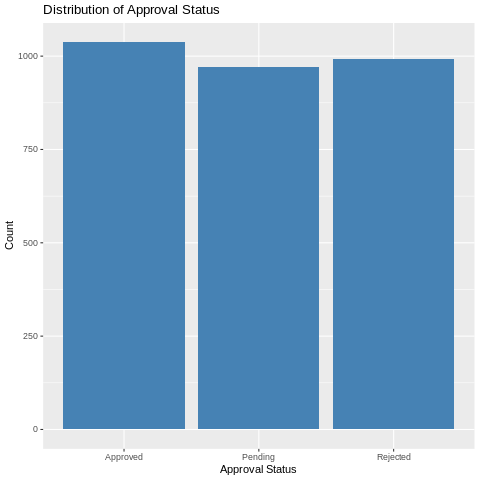

In [51]:
%%R
library(ggplot2)
ggplot(data, aes(x = `Approval Status`)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Approval Status", x = "Approval Status", y = "Count")

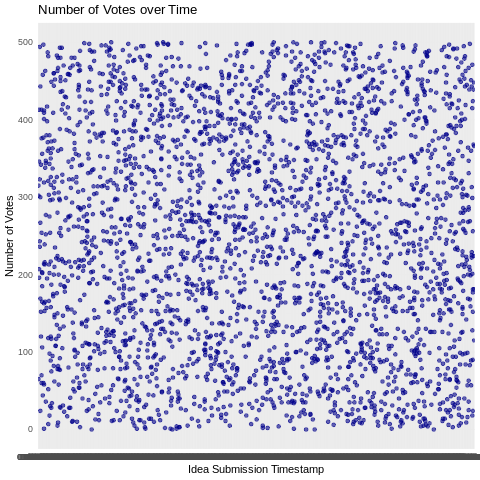

In [60]:
%%R
library(ggplot2)

ggplot(data, aes(x = `Idea Submission Date`, y = `Number of Votes`)) +
  geom_point(alpha = 0.6, color = "darkblue") +
  labs(title = "Number of Votes over Time",
       x = "Idea Submission Timestamp",
       y = "Number of Votes") +
  theme_minimal()

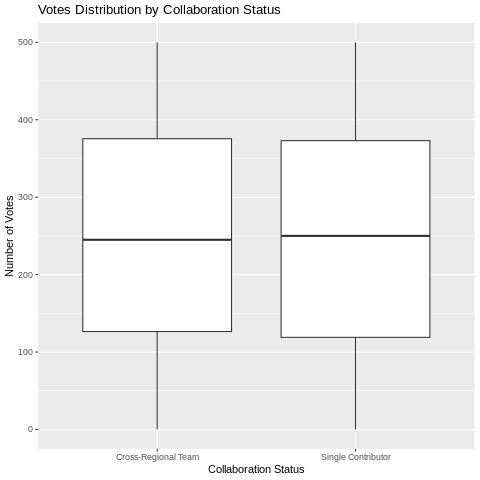

In [62]:
%%R
library(ggplot2)
ggplot(data, aes(x = `Collaboration Status`, y = `Number of Votes`)) +
  geom_boxplot() +
  labs(title = "Votes Distribution by Collaboration Status", x = "Collaboration Status", y = "Number of Votes")

In [65]:
import pandas as pd
df = pd.read_csv('bookstore_transactions.csv')
print(df.head())

  Transaction ID Customer ID            Book Title          Author      Genre  \
0       59b278fe      914e0b                  1984   George Orwell  Dystopian   
1       8f90d6f6      c8d80d              Becoming  Michelle Obama  Biography   
2       a116662e      dba9d8  The Midnight Library       Matt Haig    Fantasy   
3       2db9cc65      7cdf6c                  Dune   Frank Herbert     Sci-Fi   
4       d99cc2d4      eb00af                  Dune   Frank Herbert     Sci-Fi   

  Purchase Method  Payment Method  Stock Before  Stock After  Loyalty Points  \
0          Online            Cash            25           22              30   
1          Online  Online Payment            14           12              20   
2          Online            Cash            21           18              30   
3          Online            Cash            26           24              20   
4          Online            Card             6            5              10   

         Promotion Applied  Disc

In [72]:
combined = pd.concat(list_of_dfs, ignore_index=True)
assert len(combined) == sum(len(df) for df in list_of_dfs)
assert combined.duplicated().sum() == 0

NameError: name 'list_of_dfs' is not defined

In [73]:
# Replace this with your actual list of dataframes
list_of_dfs = [df] # Example: assuming 'df' is one of the dataframes you want to concatenate

combined = pd.concat(list_of_dfs, ignore_index=True)
assert len(combined) == sum(len(df) for df in list_of_dfs)
assert combined.duplicated().sum() == 0

print("Concatenation successful and assertions passed.")

Concatenation successful and assertions passed.


In [75]:
import pandas as pd

df = pd.read_csv('bookstore_transactions.csv')
# Count of missing per column
missing_counts = df.isnull().sum()
print(missing_counts)


Transaction ID          0
Customer ID             0
Book Title              0
Author                  0
Genre                   0
Purchase Method         0
Payment Method          0
Stock Before            0
Stock After             0
Loyalty Points          0
Promotion Applied    1575
Discount Applied        0
Order Status            0
Restock Triggered       0
dtype: int64


In [77]:
df_dropped = df.dropna(subset=['Promotion Applied'])
print(df_dropped.isnull().sum())

Transaction ID       0
Customer ID          0
Book Title           0
Author               0
Genre                0
Purchase Method      0
Payment Method       0
Stock Before         0
Stock After          0
Loyalty Points       0
Promotion Applied    0
Discount Applied     0
Order Status         0
Restock Triggered    0
dtype: int64


In [79]:
# List of columns in the dataframe
print(df.columns)

# Drop a column that exists in the dataframe
df_reduced = df.drop(columns=['Restock Triggered'])
print(df_reduced.head())

Index(['Transaction ID', 'Customer ID', 'Book Title', 'Author', 'Genre',
       'Purchase Method', 'Payment Method', 'Stock Before', 'Stock After',
       'Loyalty Points', 'Promotion Applied', 'Discount Applied',
       'Order Status', 'Restock Triggered'],
      dtype='object')
  Transaction ID Customer ID            Book Title          Author      Genre  \
0       59b278fe      914e0b                  1984   George Orwell  Dystopian   
1       8f90d6f6      c8d80d              Becoming  Michelle Obama  Biography   
2       a116662e      dba9d8  The Midnight Library       Matt Haig    Fantasy   
3       2db9cc65      7cdf6c                  Dune   Frank Herbert     Sci-Fi   
4       d99cc2d4      eb00af                  Dune   Frank Herbert     Sci-Fi   

  Purchase Method  Payment Method  Stock Before  Stock After  Loyalty Points  \
0          Online            Cash            25           22              30   
1          Online  Online Payment            14           12            

In [81]:
df['Payment Method'] = df['Payment Method'].fillna('Unknown')

In [86]:
import pandas as pd

df = pd.read_csv('bookstore_transactions.csv')

# 1. Inspect column names
print("Columns before strip:", df.columns.tolist())

# 2. Clean up whitespace / casing
df.columns = df.columns.str.strip().str.capitalize()
# this turns ' cost ' → 'Cost', 'TOTAL_cost' → 'Total_cost', etc.

print("Columns after cleanup:", df.columns.tolist())

# 3. Compute and fill
# Assuming 'Discount Applied' is the intended column for mean calculation and filling
mean_discount = df['Discount applied'].mean()
df['Discount_filled_mean'] = df['Discount applied'].fillna(mean_discount)

# 4. Check
print(df[['Discount applied', 'Discount_filled_mean']].head())

Columns before strip: ['Transaction ID', 'Customer ID', 'Book Title', 'Author', 'Genre', 'Purchase Method', 'Payment Method', 'Stock Before', 'Stock After', 'Loyalty Points', 'Promotion Applied', 'Discount Applied', 'Order Status', 'Restock Triggered']
Columns after cleanup: ['Transaction id', 'Customer id', 'Book title', 'Author', 'Genre', 'Purchase method', 'Payment method', 'Stock before', 'Stock after', 'Loyalty points', 'Promotion applied', 'Discount applied', 'Order status', 'Restock triggered']
   Discount applied  Discount_filled_mean
0                 0                     0
1                 0                     0
2                 0                     0
3                50                    50
4                 0                     0


In [88]:
df_sorted = df.sort_values('Stock after')
df_sorted['Stock_level_filled'] = df_sorted['Stock before'].ffill()
print(df_sorted[['Stock after', 'Stock before', 'Stock_level_filled']].head())

      Stock after  Stock before  Stock_level_filled
18              2             5                   5
2158            2             5                   5
99              2             5                   5
1843            2             5                   5
1602            2             5                   5


In [90]:
df['Discount_was_missing'] = df['Discount applied'].isnull()
df['Discount applied'] = df['Discount applied'].fillna(df['Discount applied'].mean())

In [92]:
import numpy as np

# Select numeric columns - Corrected column names based on available data
numeric_cols = ['Stock before', 'Stock after', 'Loyalty points']

# Using Pandas .agg for multiple stats at once
stats_df = df[numeric_cols].agg([
    'mean',    # average
    'median',  # middle value
    'std',     # standard deviation
    'min',     # minimum
    'max',     # maximum
    lambda x: x.quantile(0.25),  # 25th percentile
    lambda x: x.quantile(0.75),  # 75th percentile
])
stats_df.index = ['Mean','Median','Std Dev','Min','Max','25%','75%']
print(stats_df)

# Or compute individually with NumPy
mean_stock_before = np.mean(df['Stock before'])
median_stock_before = np.median(df['Stock before'])
std_stock_before = np.std(df['Stock before'], ddof=1)  # sample std
min_stock_before = np.min(df['Stock before'])
max_stock_before = np.max(df['Stock before'])
q1_stock_before, q3_stock_before = np.percentile(df['Stock before'], [25, 75])

mean_stock_after = np.mean(df['Stock after'])
median_stock_after = np.median(df['Stock after'])
std_stock_after = np.std(df['Stock after'], ddof=1)  # sample std
min_stock_after = np.min(df['Stock after'])
max_stock_after = np.max(df['Stock after'])
q1_stock_after, q3_stock_after = np.percentile(df['Stock after'], [25, 75])

mean_loyalty = np.mean(df['Loyalty points'])
median_loyalty = np.median(df['Loyalty points'])
std_loyalty = np.std(df['Loyalty points'], ddof=1)  # sample std
min_loyalty = np.min(df['Loyalty points'])
max_loyalty = np.max(df['Loyalty points'])
q1_loyalty, q3_loyalty = np.percentile(df['Loyalty points'], [25, 75])

         Stock before  Stock after  Loyalty points
Mean        27.763143    25.770571       13.631429
Median      28.000000    26.000000       10.000000
Std Dev     13.149466    13.169317       11.380109
Min          5.000000     2.000000        0.000000
Max         50.000000    49.000000       30.000000
25%         16.000000    14.000000        0.000000
75%         39.000000    37.000000       20.000000


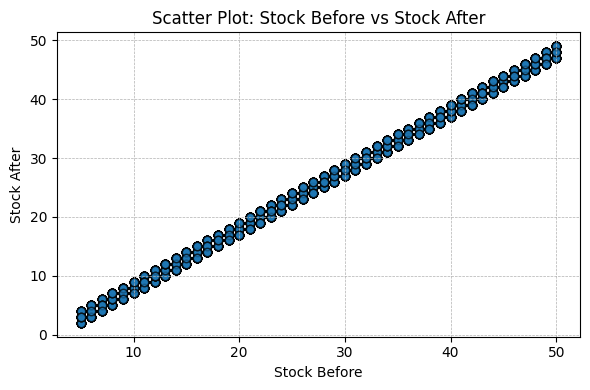

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Load your data
df = pd.read_csv('bookstore_transactions.csv')

# Step 1: Scatter plot between two numerical features
def plot_scatter(x, y):
    """
    Plots a scatter plot of df[x] vs df[y].
    """
    plt.figure(figsize=(6, 4))
    plt.scatter(df[x], df[y], alpha=0.7, edgecolor='k')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_scatter('Stock Before', 'Stock After')

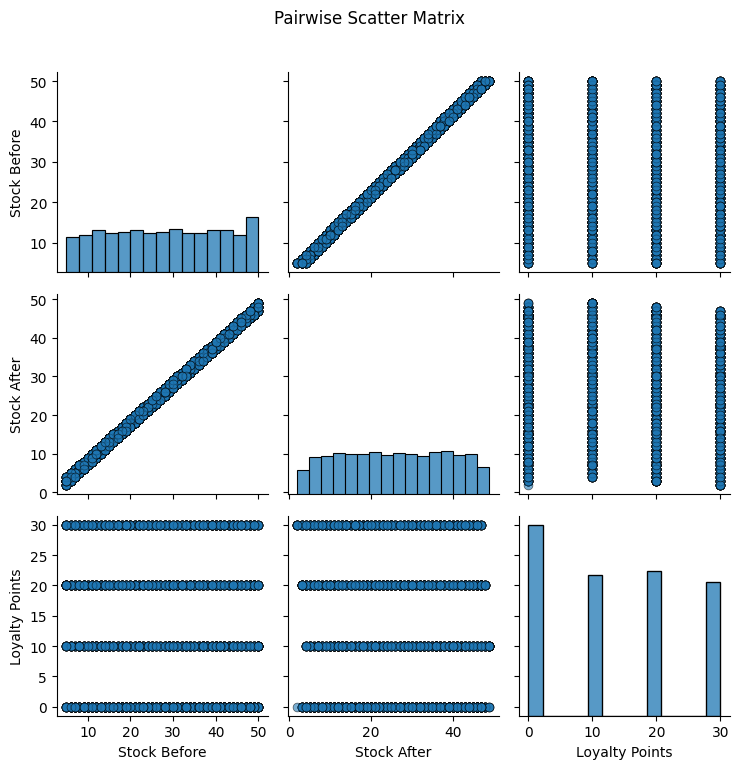

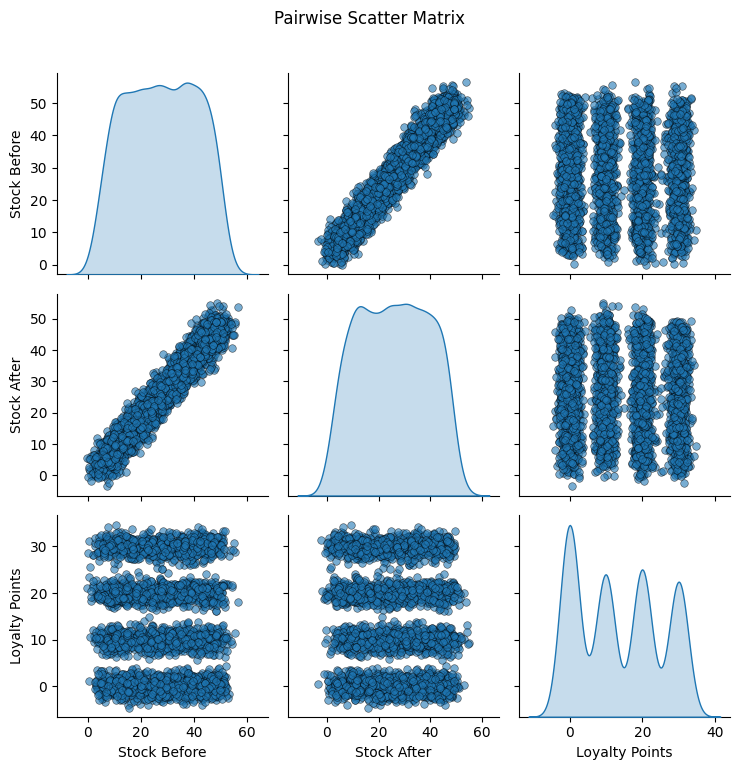

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('bookstore_transactions.csv')

# Function: Pair Plot using seaborn with options for KDE diagonal and jitter
def plot_pairplot(
    columns=None,
    diag_kind='hist',     # 'hist' or 'kde'
    add_jitter=False,
    jitter_scale=0.1,
    marker_size=40
):

    if columns is None:
        columns = df.select_dtypes(include=['number']).columns.tolist()

    data = df[columns].copy()
    # Optionally add jitter
    if add_jitter:
        for col in columns:
            rng = data[col].max() - data[col].min()
            jitter = np.random.normal(scale=jitter_scale * rng, size=len(data))
            data[col] += jitter

    # Create pair plot
    g = sns.pairplot(
        data,
        diag_kind=diag_kind,
        plot_kws={'alpha': 0.6, 'edgecolor': 'k', 's': marker_size},
        corner=False
    )

    # Adjust title
    plt.suptitle('Pairwise Scatter Matrix', y=1.02)
    plt.tight_layout()
    plt.show()

# Example usage:
# Default hist diag, no jitter
plot_pairplot(['Stock Before', 'Stock After', 'Loyalty Points'])

# KDE on diagonal, with jitter
plot_pairplot(
    ['Stock Before', 'Stock After', 'Loyalty Points'],
    diag_kind='kde',
    add_jitter=True,
    jitter_scale=0.05,
    marker_size=30
)

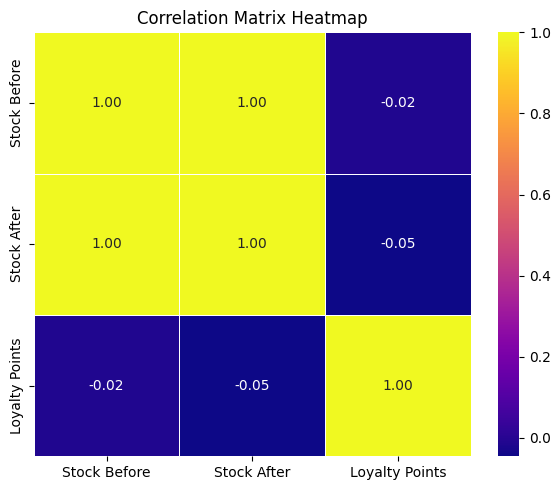

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for enhanced heatmap

# Load data
df = pd.read_csv('bookstore_transactions.csv')

# Function: Correlation Heatmap
def plot_correlation_heatmap(
    columns=None,
    cmap='viridis',
    annotate=True
):

    if columns is None:
        columns = df.select_dtypes(include=['number']).columns.tolist()

    corr = df[columns].corr()

    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=annotate, cmap=cmap, fmt=".2f", linewidths=.5) # Use seaborn heatmap for better visualization
    plt.title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_correlation_heatmap(['Stock Before', 'Stock After', 'Loyalty Points'], cmap='plasma', annotate=True)